In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

MEAO = pd.read_excel('G:\Priyabrata\ML\Material data repository.xlsx')
INPUT=MEAO.iloc[:,2:11]  #all INPUT (Variables)
TARGET=MEAO.iloc[:,20]   #all PHASES SS,SS+IM,AM
#TARGET = MEAO.iloc[:,19]

Y=MEAO.iloc[:,22] #coded phases. 0:SS, 1:SS+IM, 2:AM
#Y = MEAO.iloc[:,23] #coded phases. 0:MSS, 1:SSS, 2:SS+IM, 3:AM

#drop mixing enthalpy
selected_INPUT1 = INPUT.drop(['Mixing entropy','Mixing enthalpy','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT1

normalized_INPUT1=(selected_INPUT1-selected_INPUT1.mean())/selected_INPUT1.std()
normalized_INPUT1

,Ω,Atomic size mismatch,Λ
0,-0.631404,0.027946,-0.209450
1,-0.618275,-0.029515,-0.206598
2,-0.584828,-0.102026,-0.203809
3,-0.549350,-0.195605,-0.201020
4,-0.508245,-0.314359,-0.197724
...,...,...,...
241,-0.336948,-0.190571,-0.189724
242,-0.333822,-0.138336,-0.193755
243,-0.332368,-0.089138,-0.197356
244,-0.440570,-0.993250,0.104887


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    4.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    4.2s finished


f1_macro: 0.777 (0.071)

Maximum f1 score:  0.9171717171717172

Minimum f1 score:  0.5899159663865546


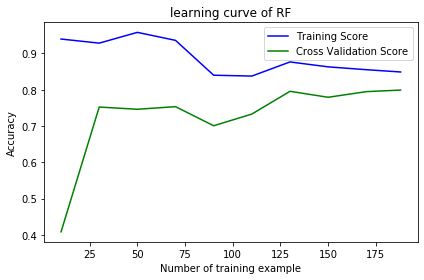

In [2]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT1, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(rfc, normalized_INPUT1, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]

A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of RF")
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


f1_macro: 0.822 (0.054)

Maximum f1 score:  0.9253034547152194

Minimum f1 score:  0.6886904761904762


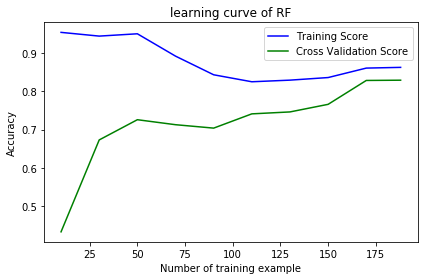

In [3]:
#drop Atomic size mismatch
selected_INPUT2 = INPUT.drop(['Mixing entropy','Atomic size mismatch','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT2

normalized_INPUT2=(selected_INPUT2-selected_INPUT2.mean())/selected_INPUT2.std()
normalized_INPUT2

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT2, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(rfc, normalized_INPUT2, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]

A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of RF")
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


f1_macro: 0.824 (0.044)

Maximum f1 score:  0.9253034547152194

Minimum f1 score:  0.7358918128654971


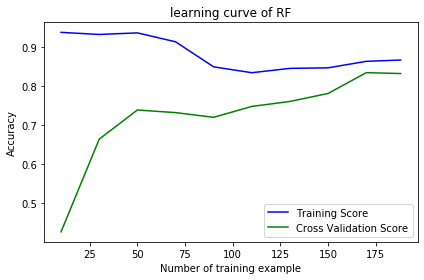

In [4]:
#drop Λ
selected_INPUT3 = INPUT.drop(['Mixing entropy','Λ','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT3

normalized_INPUT3=(selected_INPUT3-selected_INPUT3.mean())/selected_INPUT3.std()
normalized_INPUT3

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT3, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(rfc, normalized_INPUT3, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]

A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of RF")
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.8s finished


f1_macro: 0.803 (0.056)

Maximum f1 score:  0.9111111111111111

Minimum f1 score:  0.6402606659199673


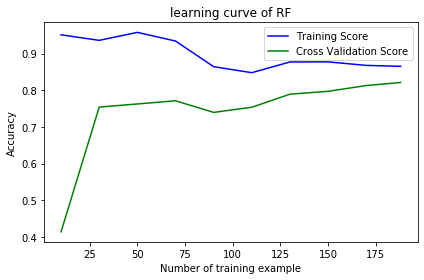

In [5]:
#drop Ω
selected_INPUT4 = INPUT.drop(['Mixing entropy','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT4

normalized_INPUT4=(selected_INPUT4-selected_INPUT4.mean())/selected_INPUT4.std()
normalized_INPUT4

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT4, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(rfc, normalized_INPUT4, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]

A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of RF")
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


f1_macro: 0.811 (0.058)

Maximum f1 score:  0.9585858585858587

Minimum f1 score:  0.6648086213303604


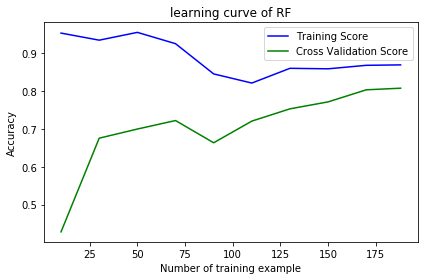

In [6]:
#drop atomic size mismatch and mixing enthalpy
selected_INPUT5 = INPUT.drop(['Mixing entropy','Mixing enthalpy','Atomic size mismatch','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT5

normalized_INPUT5=(selected_INPUT5-selected_INPUT5.mean())/selected_INPUT5.std()
normalized_INPUT5

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT5, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(rfc, normalized_INPUT5, Y, train_sizes=[10, 30, 50, 70,90, 110,130,150,170,188], cv=nskf,scoring='f1_macro')
train_no=[10, 30, 50, 70,90, 110,130,150,170,188]

A=np.mean(train_scores, axis = 1)
B=np.mean(valid_scores, axis = 1)

plt.plot(train_no, A,label = "Training Score", color = 'b')
plt.plot(train_no, B,label = "Cross Validation Score", color = 'g')
plt.title("learning curve of RF")
plt.xlabel("Number of training example")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()

In [12]:

#drop Ω and mixing enthalpy
selected_INPUT6 = INPUT.drop(['Mixing entropy','Mixing enthalpy','Ω','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT6

normalized_INPUT6=(selected_INPUT6-selected_INPUT6.mean())/selected_INPUT6.std()
normalized_INPUT6

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT6, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s


f1_macro: 0.755 (0.063)

Maximum f1 score:  0.867741935483871

Minimum f1 score:  0.607238708687984


[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


In [11]:
#drop Λ and mixing enthalpy
selected_INPUT7 = INPUT.drop(['Mixing entropy','Mixing enthalpy','Λ','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT7

normalized_INPUT7=(selected_INPUT7-selected_INPUT7.mean())/selected_INPUT7.std()
normalized_INPUT7

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT7, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s


f1_macro: 0.807 (0.055)

Maximum f1 score:  0.8982964658021867

Minimum f1 score:  0.6958333333333333


[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


In [19]:
#drop Λ and Ω
selected_INPUT8 = INPUT.drop(['Mixing entropy','Ω','Λ','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT8

normalized_INPUT8=(selected_INPUT8-selected_INPUT8.mean())/selected_INPUT8.std()
normalized_INPUT8

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT8, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s


f1_macro: 0.826 (0.048)

Maximum f1 score:  0.9309749784296808

Minimum f1 score:  0.7339181286549707


[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


In [23]:
#drop atomic size mismatch and Ω
selected_INPUT8 = INPUT.drop(['Mixing entropy','Ω','Atomic size mismatch','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT8

normalized_INPUT8=(selected_INPUT8-selected_INPUT8.mean())/selected_INPUT8.std()
normalized_INPUT8

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT8, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s


f1_macro: 0.842 (0.045)

Maximum f1 score:  0.9314954051796157

Minimum f1 score:  0.7610513739545998


[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


In [24]:
#drop atomic size mismatch and Λ
selected_INPUT8 = INPUT.drop(['Mixing entropy','Λ','Atomic size mismatch','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT8

normalized_INPUT8=(selected_INPUT8-selected_INPUT8.mean())/selected_INPUT8.std()
normalized_INPUT8

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT8, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s


f1_macro: 0.706 (0.061)

Maximum f1 score:  0.8441590086326928

Minimum f1 score:  0.5616413916146299


[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


In [25]:
#Keep mixing enthalpy
selected_INPUT8 = INPUT.drop(['Mixing entropy','Λ','Ω','Atomic size mismatch','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT8

normalized_INPUT8=(selected_INPUT8-selected_INPUT8.mean())/selected_INPUT8.std()
normalized_INPUT8

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
scores = cross_val_score(rfc, normalized_INPUT8, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s


f1_macro: 0.697 (0.063)

Maximum f1 score:  0.8359477124183007

Minimum f1 score:  0.5616413916146299


[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


In [26]:
#Keep Atomic size mismatch
selected_INPUT8 = INPUT.drop(['Mixing entropy','Λ','Ω','Mixing enthalpy','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT8

normalized_INPUT8=(selected_INPUT8-selected_INPUT8.mean())/selected_INPUT8.std()
normalized_INPUT8

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT8, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.5s


f1_macro: 0.755 (0.068)

Maximum f1 score:  0.8506375227686703

Minimum f1 score:  0.5845679012345678


[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


In [27]:
#Keep Λ
selected_INPUT8 = INPUT.drop(['Mixing entropy','Atomic size mismatch','Ω','Mixing enthalpy','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT8

normalized_INPUT8=(selected_INPUT8-selected_INPUT8.mean())/selected_INPUT8.std()
normalized_INPUT8

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT8, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s


f1_macro: 0.768 (0.057)

Maximum f1 score:  0.875505757858699

Minimum f1 score:  0.660483870967742


[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


In [28]:
#Keep omega
selected_INPUT8 = INPUT.drop(['Mixing entropy','Atomic size mismatch','Λ','Mixing enthalpy','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT8

normalized_INPUT8=(selected_INPUT8-selected_INPUT8.mean())/selected_INPUT8.std()
normalized_INPUT8

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT8, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s


f1_macro: 0.672 (0.058)

Maximum f1 score:  0.7992530345471521

Minimum f1 score:  0.5296296296296297


[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished


In [30]:
#Keep 4 parameters
selected_INPUT8 = INPUT.drop(['Mixing entropy','γ','VEC','Pauling electronegativity','Molar volume dispersity'],axis=1)
selected_INPUT8

normalized_INPUT8=(selected_INPUT8-selected_INPUT8.mean())/selected_INPUT8.std()
normalized_INPUT8

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=30, max_depth=6, max_leaf_nodes=10, min_samples_split=6,max_features='auto', bootstrap=True, n_jobs=-1)
nskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
scores = cross_val_score(rfc, normalized_INPUT8, Y, scoring='f1_macro', verbose=4,cv=nskf, n_jobs=-1)
scores
# report performance
print('f1_macro: %.3f (%.3f)' % (mean(scores), std(scores)))
print('\nMaximum f1 score: ', max(scores))
print('\nMinimum f1 score: ', min(scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.4s


f1_macro: 0.846 (0.048)

Maximum f1 score:  0.9559139784946237

Minimum f1 score:  0.7098870056497176


[Parallel(n_jobs=-1)]: Done  48 out of  50 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.7s finished
